# Microsoft Movie Needs Analysis

**Authors:** Lorela Blaka, Eric Denbin, Jesse Markowitz

## Overview

Microsoft bleep blop bloop

### Business Problem

Microsoft blah blah blah...

## Data Understanding

"The Numbers" is a movie blog focused on data. It publicly available datasets containing historical financial information from the first movies to the latest. IMDB has several datasets available of movie details such as cast, crew, runtime, genre, and ratings.

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime

### Analyzing financial data from The Numbers
This data set details production budget, as well as domestic and worldwide gross revenue. It also specifies the exact release date for each movie.

In [2]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The dates are `strings`, so we add a `'release_year'` column with the year as `int` type. We also drop `'id'`.

In [3]:
movie_budgets['release_year'] = movie_budgets['release_date'].map(lambda x: int(x[-4:]))
movie_budgets.drop('id', axis=1, inplace=True)

All financial datapoints are also given as `strings`, so we convert to `ints`, then add columns for profit and ROI, both domestic and worldwide.

In [4]:
# lambda function starts index at 1 to remove $ in value, converts to int 
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].map(lambda x: int(x[1:].replace(",","")))
movie_budgets['production_budget'] = movie_budgets['production_budget'].map(lambda x: int(x[1:].replace(",","")))
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].map(lambda x: int(x[1:].replace(",","")))

In [5]:
movie_budgets["domestic_profit"] = movie_budgets["domestic_gross"] - movie_budgets["production_budget"]
movie_budgets["worldwide_profit"] = movie_budgets["worldwide_gross"] - movie_budgets["production_budget"]

In [6]:
movie_budgets["domestic_roi"] = movie_budgets["domestic_profit"]/movie_budgets['production_budget']
movie_budgets["worldwide_roi"] = movie_budgets["worldwide_profit"]/movie_budgets["production_budget"]

In [7]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,335507625,2351345279,0.789430,5.532577
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,-169536125,635063875,-0.412899,1.546673
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-307237650,-200237650,-0.877822,-0.572108
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,128405868,1072413963,0.388403,3.243841
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,303181382,999721747,0.956408,3.153696


Analyzing percentiles shows just how difficult it can be to make money in this business! Notice that the 50th percentile for both domestic and worldwide ROI are close to 0. And yet, the 25th percentile for budget is \\$5 million.

In [8]:
movie_budgets.describe()

,production_budget,domestic_gross,worldwide_gross,release_year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03,5.782000e+03,5782.000000,5782.000000
mean,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139,1.028557e+07,5.989970e+07,1.983540,3.800161
std,4.181208e+07,6.824060e+07,1.747200e+08,12.724386,4.992137e+07,1.460889e+08,26.086591,29.530282
min,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000,-3.072376e+08,-2.002376e+08,-1.000000,-1.000000
25%,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000,-9.132757e+06,-2.189071e+06,-0.794367,-0.507704
50%,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000,-3.487755e+05,8.550286e+06,-0.121674,0.708310
75%,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000,1.778144e+07,6.096850e+07,1.058148,2.758346
max,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000,6.306622e+08,2.351345e+09,1799.000000,1799.000000


#### Identifying successful movies
Successful movies are defined as those with a worldwide ROI greater than or equal to 5. 

We filter for movies with a production budget above the 25th percentile (greater than or equal to \\$5 million). A worldwide gross greater than \\$0 avoids movies that were either never released or only released on streaming services such as Netflix. 

Finally, we include movies released only during or after 2010 to ensure our data is a culturally relevant as possible. We disqualify movies released after 2019 to avoid complicating our data with the effects of the global covid-19 pandemic.

In [9]:
top_movie_budgets = movie_budgets[(movie_budgets['worldwide_roi']>=5) 
             & ((movie_budgets['production_budget']>=5000000)
             & (movie_budgets['worldwide_gross']>=0))
              & (movie_budgets['release_year'] < 2020) 
                & (movie_budgets['release_year'] >= 2010)]

In [10]:
top_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,630662225,1747311220,2.060988,5.710167
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,378815482,1748134200,1.262718,5.827114
26,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,398279547,1292935897,1.770131,5.746382
33,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,437270625,1433854864,2.033817,6.669092
41,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018,500059566,1148258224,2.500298,5.741291


### ROI and Budget
Finding the sweet spot of spending and return.

### ROI over time
What are the trends over the course of a year with ROI of top movies?

### Adding in qualitative movie data from IMDB
We now import and merge IMDB data, which provides genre information for movies released from 2010-2019.

In [11]:
title_basics  = pd.read_csv("unzippedData/imdb.title.basics.csv")
ratings = pd.read_csv('imdb.title.ratings.csv.gz')

Basic cleaning involves renaming columns, converting years from strings to ints, and dropping extraneous columns.

In [12]:
movies_info = title_basics.merge(ratings, how='left', on='tconst')
movies_info.rename({'primary_title' : 'movie', 
                    'start_year' : 'release_year'}, axis =1, inplace= True)
movies_info['release_year'] = movies_info['release_year'].astype(int)
movies_info.head()

,tconst,movie,original_title,release_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


We merge our IMDB data into `'top_movies_df'` in order to begin analyzing genre distributions among successful movies compared to all movies from 2010-2019. There are multiple movies with the same name in the IMDB data that are not present in The Numbers, so we merge by both `'movie'` (name) and `'release_year'`, then check that the `'original_title'` from IMDB is in fact the same name as the movie listed in The Numbers. This returns 155 movies representing the most successful movies from this recent decade.

In [13]:
top_movies_df = top_movie_budgets.merge(movies_info, how='left', on =['movie','release_year'])
top_movies_df = top_movies_df[top_movies_df['movie']== top_movies_df['original_title']]
top_movies_df.drop('original_title', axis=1, inplace=True)
top_movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,tconst,runtime_minutes,genres,averagerating,numvotes
1,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,378815482,1748134200,1.262718,5.827114,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
2,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,398279547,1292935897,1.770131,5.746382,tt0848228,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
3,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,437270625,1433854864,2.033817,6.669092,tt0369610,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
4,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018,500059566,1148258224,2.500298,5.741291,tt1825683,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0
5,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,2018,408581744,1042520711,2.042909,5.212604,tt3606756,118.0,"Action,Adventure,Animation",7.7,203510.0


In [14]:
top_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 1 to 192
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       155 non-null    object 
 1   movie              155 non-null    object 
 2   production_budget  155 non-null    int64  
 3   domestic_gross     155 non-null    int64  
 4   worldwide_gross    155 non-null    int64  
 5   release_year       155 non-null    int64  
 6   domestic_profit    155 non-null    int64  
 7   worldwide_profit   155 non-null    int64  
 8   domestic_roi       155 non-null    float64
 9   worldwide_roi      155 non-null    float64
 10  tconst             155 non-null    object 
 11  runtime_minutes    155 non-null    float64
 12  genres             155 non-null    object 
 13  averagerating      154 non-null    float64
 14  numvotes           154 non-null    float64
dtypes: float64(5), int64(6), object(4)
memory usage: 19.4+ KB


In [15]:
top_movies_df_columns = list(top_movies_df.columns)
top_movies_df_columns.remove('genres')
top_movies_df_columns

['release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'release_year',
 'domestic_profit',
 'worldwide_profit',
 'domestic_roi',
 'worldwide_roi',
 'tconst',
 'runtime_minutes',
 'averagerating',
 'numvotes']

In [16]:
top_movies_df.dropna(subset=['genres'], inplace=True)
top_movies_df['genres'] = top_movies_df['genres'].map(lambda x: x.split(","))

top_movies_df = top_movies_df.genres.apply(pd.Series) \
    .merge(top_movies_df, right_index = True, left_index = True) \
    .drop(["genres"], axis = 1) \
    .melt(id_vars = top_movies_df_columns , value_name = "genres") \
    .dropna()

In [17]:
top_movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,tconst,runtime_minutes,averagerating,numvotes,variable,genres
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,378815482,1748134200,1.262718,5.827114,tt4154756,149.0,8.5,670926.0,0,Action
1,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,398279547,1292935897,1.770131,5.746382,tt0848228,143.0,8.1,1183655.0,0,Action
2,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,437270625,1433854864,2.033817,6.669092,tt0369610,124.0,7.0,539338.0,0,Action
3,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018,500059566,1148258224,2.500298,5.741291,tt1825683,134.0,7.3,516148.0,0,Action
4,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,2018,408581744,1042520711,2.042909,5.212604,tt3606756,118.0,7.7,203510.0,0,Action


In [18]:
top_movies_df.genres.value_counts()

Drama          74
Comedy         54
Action         36
Thriller       36
Horror         34
Adventure      31
Mystery        30
Romance        23
Sci-Fi         22
Biography      16
Animation      14
Crime          11
Fantasy         8
Music           7
Family          6
History         4
Musical         2
Documentary     2
Sport           2
Western         1
Name: genres, dtype: int64

In [19]:
movies_info.head()

,tconst,movie,original_title,release_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [20]:
movies_info.drop(['tconst', 'original_title', 'runtime_minutes', 'averagerating', 'numvotes'], axis=1, inplace=True)

In [21]:
movies_info.head()

,movie,release_year,genres
0,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,"Biography,Drama"
2,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [22]:
movies_info_columns = list(movies_info.columns)
movies_info_columns.remove('genres')
movies_info_columns

movies_info.dropna(subset=['genres'], inplace=True)
movies_info['genres'] = movies_info['genres'].map(lambda x: x.split(","))

movies_info = movies_info.genres.apply(pd.Series) \
    .merge(movies_info, right_index = True, left_index = True) \
    .drop(["genres"], axis = 1) \
    .melt(id_vars = movies_info_columns , value_name = "genres") \
    .dropna()

In [23]:
movies_info.head()

,movie,release_year,variable,genres
0,Sunghursh,2013,0,Action
1,One Day Before the Rainy Season,2019,0,Biography
2,The Other Side of the Wind,2018,0,Drama
3,Sabse Bada Sukh,2018,0,Comedy
4,The Wandering Soap Opera,2017,0,Comedy


In [24]:
movies_info.genres.value_counts()

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Family          6227
History         6225
Mystery         4659
Music           4314
Fantasy         3516
Sci-Fi          3365
Animation       2799
Sport           2234
News            1551
Musical         1430
War             1405
Western          467
Reality-TV        98
Talk-Show         50
Adult             25
Short             11
Game-Show          4
Name: genres, dtype: int64

In [25]:
all_genres_df = movies_info.groupby('genres')['genres'].count()
all_genres_df = pd.Series.to_frame(all_genres_df) 
all_genres_df.rename(columns={'genres': 'count_all'}, inplace=True)
all_genres_df.reset_index(inplace=True)
all_genres_df.head()

,genres,count_all
0,Action,10335
1,Adult,25
2,Adventure,6465
3,Animation,2799
4,Biography,8722


In [26]:
top_genres_df = top_movies_df.groupby('genres')['genres'].count()
top_genres_df = pd.Series.to_frame(top_genres_df)
top_genres_df.rename(columns={'genres': 'count_top'}, inplace=True)
top_genres_df.reset_index(inplace=True)
top_genres_df.head()

,genres,count_top
0,Action,36
1,Adventure,31
2,Animation,14
3,Biography,16
4,Comedy,54


In [27]:
compare_genres_df = top_genres_df.merge(all_genres_df, how='left')
compare_genres_df

,genres,count_top,count_all
0,Action,36,10335
1,Adventure,31,6465
2,Animation,14,2799
3,Biography,16,8722
4,Comedy,54,25312
5,Crime,11,6753
6,Documentary,2,51640
7,Drama,74,49883
8,Family,6,6227
9,Fantasy,8,3516


In [28]:
count_top_sum = compare_genres_df.count_top.sum()
count_all_sum = compare_genres_df.count_all.sum()
compare_genres_df['percentage_top'] = compare_genres_df['count_top'].map(lambda x: 100*(x/count_top_sum))
compare_genres_df['percentage_all'] = compare_genres_df['count_all'].map(lambda x: 100*(x/count_all_sum))

compare_genres_df.head()

,genres,count_top,count_all,percentage_top,percentage_all
0,Action,36,10335,8.716707,4.564808
1,Adventure,31,6465,7.506053,2.855490
2,Animation,14,2799,3.389831,1.236275
3,Biography,16,8722,3.874092,3.852371
4,Comedy,54,25312,13.075061,11.179916


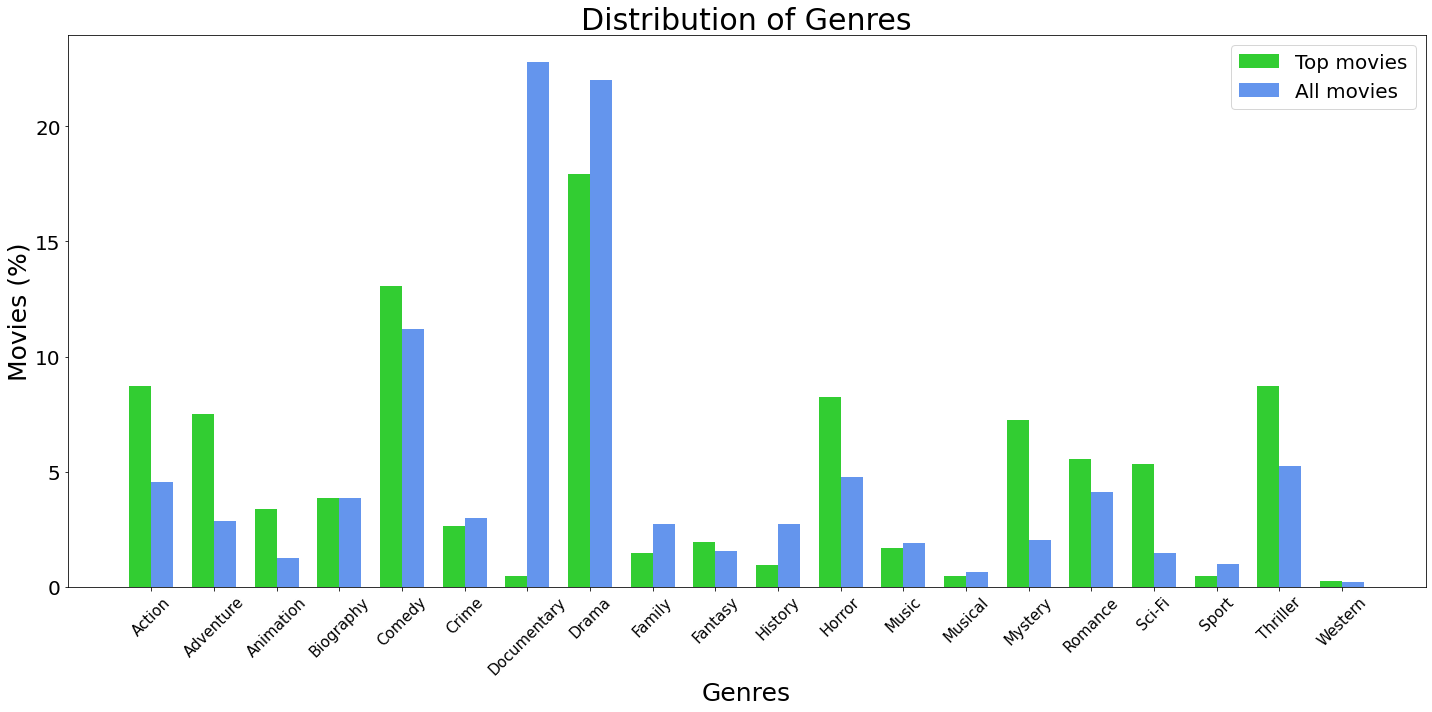

In [32]:
import matplotlib.pyplot as plt
import numpy as np

xlabels = list(compare_genres_df['genres'])
top_genre_percentages = list(compare_genres_df['percentage_top'])
all_genre_percentages = list(compare_genres_df['percentage_all'])

x = np.arange(len(xlabels))
width = 0.35

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x - width/2, top_genre_percentages, width, label='Top movies', color='limegreen')
ax.bar(x + width/2, all_genre_percentages, width, label='All movies', color='cornflowerblue')

ax.set_title('Distribution of Genres', size=30)
ax.set_ylabel('Movies (%)', size=25)
ax.tick_params(axis='y', labelsize=20)
ax.set_xticks(x)
ax.set_xticklabels(xlabels, size=15, rotation=45)
ax.set_xlabel('Genres', size=25)
ax.legend(fontsize=20)

fig.tight_layout()

plt.savefig('./distribution_of_genres.png')
plt.show()

In [30]:
relevant_movies = movie_budgets[(movie_budgets['worldwide_gross'] > 0) 
                                   & (movie_budgets['domestic_gross'] > 0) 
                                   & (movie_budgets['production_budget'] >= 5000000) 
                                   & (movie_budgets['release_year'] != 2020) ]